# What factors have an impact on infant mortality?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from statistics import mean

In [2]:
#step 1: import data
df = pd.read_excel ('raw_data.xlsx')
df

,Year,IMR,GDPPC,HEXPPC,EDUCPC
0,1951,82.0,617.59,8.80,14.60
1,1952,78.0,629.63,10.51,16.47
2,1953,71.0,619.40,10.78,16.96
3,1954,72.0,623.65,10.84,15.96
4,1955,71.0,648.85,10.67,15.51
5,1956,67.0,634.94,11.40,17.84
6,1957,68.0,622.72,11.87,19.88
7,1958,64.0,619.15,12.90,22.09
8,1959,58.0,617.71,14.72,24.84
9,1960,57.0,641.41,14.28,24.14


Variable names:

    IMR = infant mortality rate
    GDPPC = GDP per capita
    HEXPPC = health expenditure per capita
    EDUCPC = educational expenditure per capita

In [3]:
df.shape

(31, 5)

In [4]:
#step 2: check data types
df.dtypes

Year         int64
IMR        float64
GDPPC      float64
HEXPPC     float64
EDUCPC     float64
dtype: object

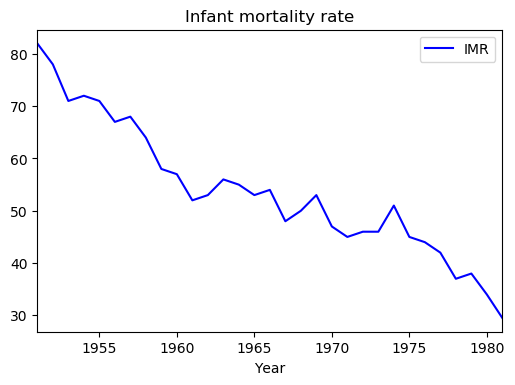

In [53]:
#step 3: visualise variables
df.plot(
    x='Year',
    y='IMR',
    kind='line',
    color='blue',
    title='Infant mortality rate')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 4]

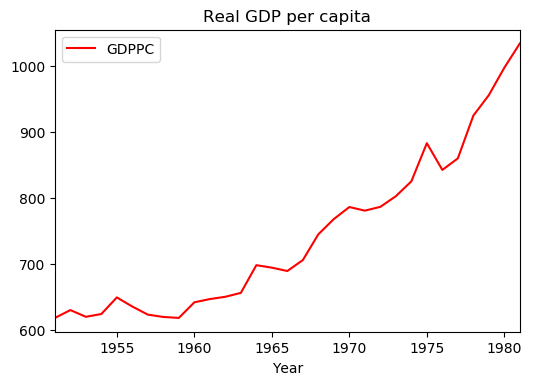

In [54]:
df.plot(
    x='Year',
    y='GDPPC',
    kind='line',
    color='red',
    title='Real GDP per capita')

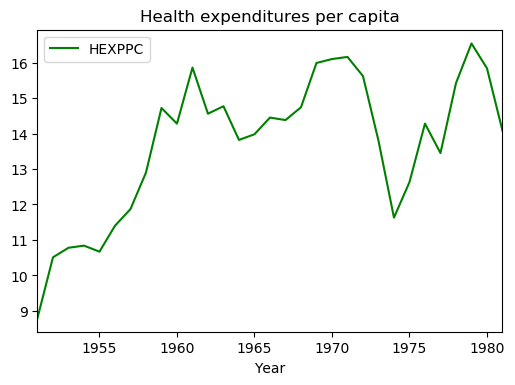

In [55]:
df.plot(
    x='Year',
    y='HEXPPC',
    kind='line',
    color='green',
    title='Health expenditures per capita')

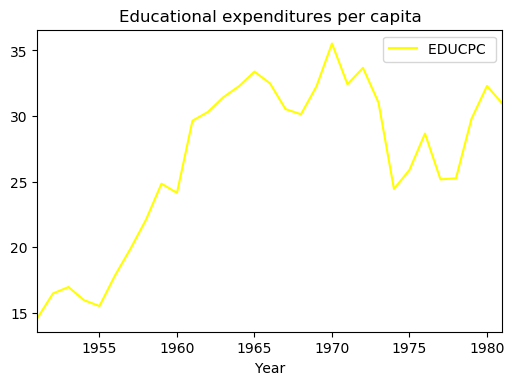

In [56]:
df.plot(
    x='Year',
    y='EDUCPC ',
    kind='line',
    color='yellow',
    title='Educational expenditures per capita')
#tried to use rstrip() to remove whitsepace after EDUCPC variable. Too much pain

In [9]:
#step 4: descriptive stats
df.describe()
#correct results (cross-checked in Excel, as for all other results)

,Year,IMR,GDPPC,HEXPPC,EDUCPC
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1966.000000,53.758065,742.132258,13.705484,26.638710
std,9.092121,12.847095,123.378309,2.014994,6.335115
min,1951.000000,29.500000,617.590000,8.800000,14.600000
25%,1958.500000,45.500000,638.175000,12.250000,23.115000
50%,1966.000000,53.000000,697.830000,14.280000,29.640000
75%,1973.500000,61.000000,813.875000,15.095000,31.850000
max,1981.000000,82.000000,1034.600000,16.540000,35.530000


In [10]:
#step 5: add median and mode
print('Median IMR:', df['IMR'].median())
print('Median GDPPC:', df['GDPPC'].median())
print('Median HEXPPC:', df['HEXPPC'].median())
print('Median EDUCPC:', df['EDUCPC '].median())

Median IMR: 53.0
Median GDPPC: 697.83
Median HEXPPC: 14.28
Median EDUCPC: 29.64


In [11]:
print(df['IMR'].mode())
print(df['GDPPC'].mode())
print(df['HEXPPC'].mode())
print(df['EDUCPC '].mode())

0    53.0
dtype: float64
0      617.59
1      617.71
2      619.15
3      619.40
4      622.72
5      623.65
6      629.63
7      634.94
8      641.41
9      646.34
10     648.85
11     649.81
12     655.75
13     688.95
14     694.04
15     697.83
16     705.56
17     744.75
18     767.87
19     780.63
20     786.16
21     786.43
22     802.60
23     825.15
24     842.48
25     860.07
26     883.11
27     924.96
28     956.14
29     997.82
30    1034.60
dtype: float64
0    14.28
dtype: float64
0     14.60
1     15.51
2     15.96
3     16.47
4     16.96
5     17.84
6     19.88
7     22.09
8     24.14
9     24.44
10    24.84
11    25.17
12    25.25
13    25.89
14    28.66
15    29.64
16    29.78
17    30.13
18    30.31
19    30.53
20    30.93
21    31.03
22    31.44
23    32.26
24    32.27
25    32.29
26    32.42
27    32.49
28    33.38
29    33.67
30    35.53
dtype: float64


GDPPC and EDUCPC do not have a mode.

Text(39, 10.5, 'median, mode')

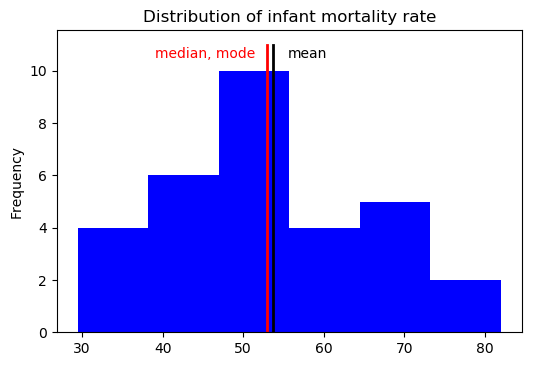

In [13]:
#step 5: plot distributions
df['IMR'].plot(
    kind='hist',
    bins=6,
    color='blue',
    title='Distribution of infant mortality rate')

#adding mean line
plt.plot([53.75, 53.75], [0, 11], 'k-', lw=2)
plt.annotate('mean', xy=(55.5, 10.5))

#adding median line and mode
plt.plot([53, 53], [0, 11], 'k-', lw=2, color='red')
plt.annotate('median, mode', xy=(39, 10.5), color='red')

Text(690, 12.7, 'median')

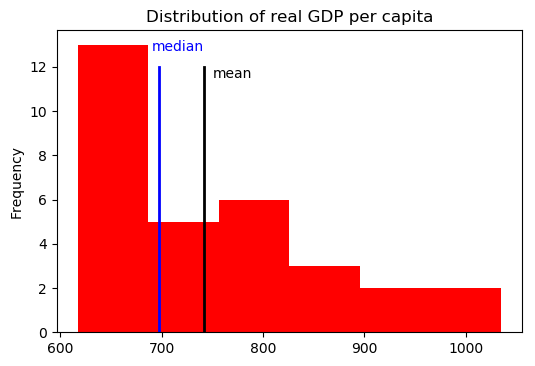

In [14]:
df['GDPPC'].plot(
    kind='hist',
    bins=6,
    color='red',
    title='Distribution of real GDP per capita')

#adding mean line
plt.plot([742.13, 742.13], [0, 12], 'k-', lw=2)
plt.annotate('mean', xy=(750, 11.5))

#adding median line
plt.plot([697.83, 697.83], [0, 12], 'k-', lw=2, color='blue')
plt.annotate('median', xy=(690, 12.7), color='blue')

Text(14.6, 10.3, 'median, mode')

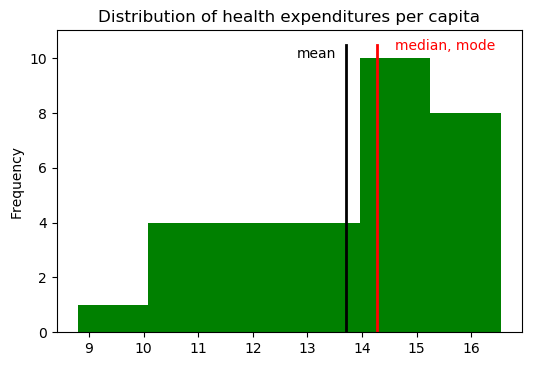

In [15]:
df['HEXPPC'].plot(
    kind='hist',
    bins=6,
    color='green',
    title='Distribution of health expenditures per capita')

#adding mean line
plt.plot([13.7, 13.7], [0, 10.5], 'k-', lw=2)
plt.annotate('mean', xy=(12.8, 10))

#adding media line and mode
plt.plot([14.28, 14.28], [0, 10.5], 'k-', lw=2, color='red')
plt.annotate('median, mode', xy=(14.6, 10.3), color='red')

Text(30.3, 9.5, 'median')

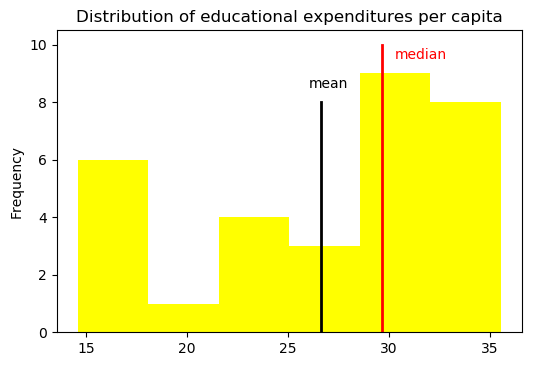

In [16]:
df['EDUCPC '].plot(
    kind='hist',
    bins=6,
    color='yellow',
    title='Distribution of educational expenditures per capita')

#adding mean line
plt.plot([26.64, 26.64], [0, 8], 'k-', lw=2)
plt.annotate('mean', xy=(26, 8.5))

#adding median line
plt.plot([29.64, 29.64], [0, 10], 'k-', lw=2, color='red')
plt.annotate('median', xy=(30.3, 9.5), color='red')

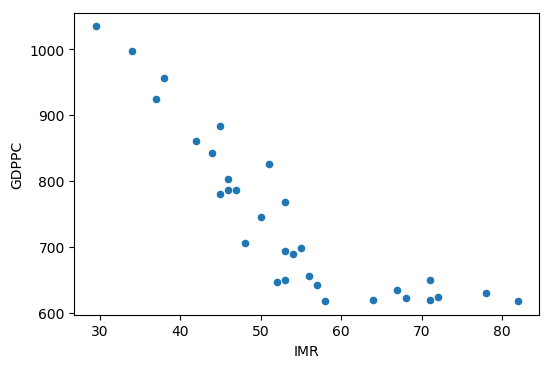

In [17]:
#step 6: visualise pairs of variables in scatter plot (always including IMR)
df.plot.scatter(
    x='IMR',
    y='GDPPC')

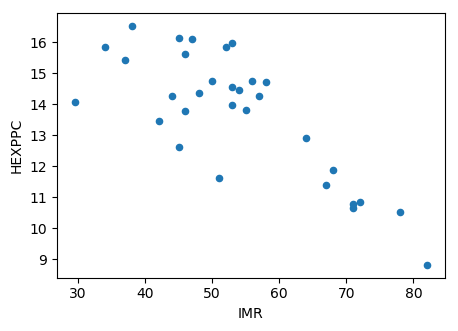

In [63]:
df.plot.scatter(
    x='IMR',
    y='HEXPPC')
plt.rcParams['figure.figsize'] = [5, 3.5]

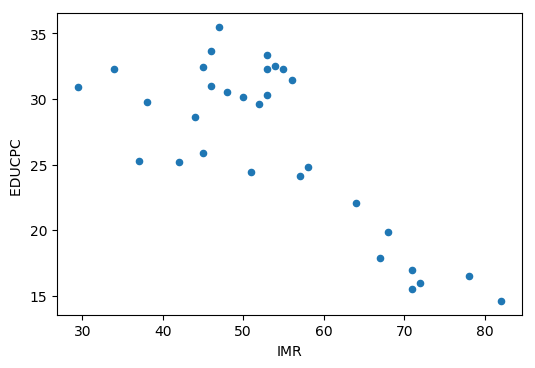

In [19]:
df.plot.scatter(
    x='IMR',
    y='EDUCPC ')

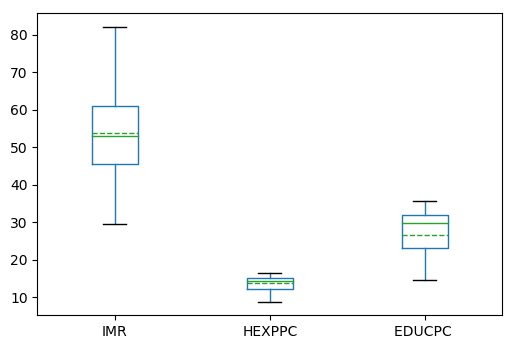

In [20]:
#step 7: compute correlation coefficient for each pair of variables
#first I check if there are outliers in the distribution of my variables
#if so, I will use the Spearman coefficient instead of Pearson

df.boxplot(
    column =['IMR', 'HEXPPC', 'EDUCPC '],
    grid = False,
    meanline=True,
    showmeans=True,
    showcaps=True,
    showbox=True,            
    showfliers=True)

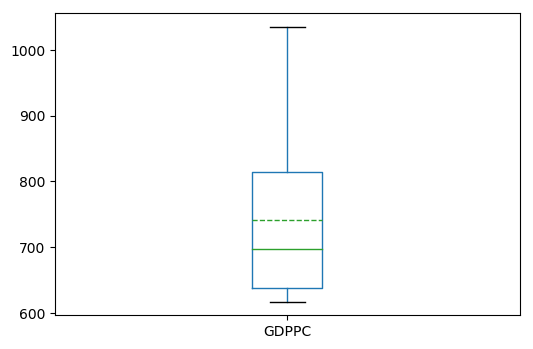

In [21]:
df.boxplot(
    column =['GDPPC'],
    grid = False,
    meanline=True,
    showmeans=True,
    showcaps=True,
    showbox=True,
    showfliers=True)
#displayed GDPPC on a different chart because it has a much larger scale. Cannot see anything in one chart

There does not seem to be any outliers, so I use the Pearson correlaation coefficient.

In [23]:
#method 1
corr_IMR_GDPPC = df['IMR'].corr(df['GDPPC'], method='pearson')
print('Correlation coeffcient IMR and GDPPC:', corr_IMR_GDPPC)

corr_IMR_HEXPPC = df['IMR'].corr(df['HEXPPC'], method='pearson')
print('Correlation coeffcient IMR and HEXPPC:', corr_IMR_HEXPPC)

corr_IMR_EDUCPC = df['IMR'].corr(df['EDUCPC '], method='pearson')
print('Correlation coeffcient IMR and EDUCPC:', corr_IMR_EDUCPC)

Correlation coeffcient IMR and GDPPC: -0.8628471048527903
Correlation coeffcient IMR and HEXPPC: -0.7811298424456933
Correlation coeffcient IMR and EDUCPC: -0.7700147560126995


It seems that IMR has a strong negative correlation with each respective independent variable in the model. This is consistent with the trend of each variable and with the visualisation of pairwise variables in scatter plots.

In [25]:
#step 8: check that results are similar using Spearman's correlation coefficient

corr_IMR_GDPPC = df['IMR'].corr(df['GDPPC'], method='spearman')
print('Spearman coefficient IMR and GDPPC:', corr_IMR_GDPPC)

corr_IMR_HEXPPC = df['IMR'].corr(df['HEXPPC'], method='spearman')
print('Spearman coefficient IMR and HEXPPC:', corr_IMR_HEXPPC)

corr_IMR_EDUCPC = df['IMR'].corr(df['EDUCPC '], method='spearman')
print('Spearman coefficient IMR and EDUCPC:', corr_IMR_EDUCPC)

Spearman coefficient IMR and GDPPC: -0.9343288922824653
Spearman coefficient IMR and HEXPPC: -0.6135997895768195
Spearman coefficient IMR and EDUCPC: -0.5911430909927928


In [26]:
#method 2 is easier to read because more space
data = df[['IMR','GDPPC']]
correlation = data.corr(method='pearson')
print(correlation)
print('')

data = df[['IMR','HEXPPC']]
correlation = data.corr(method='pearson')
print(correlation)
print('')

data = df[['IMR','EDUCPC ']]
correlation = data.corr(method='pearson')
print(correlation)

            IMR     GDPPC
IMR    1.000000 -0.862847
GDPPC -0.862847  1.000000

            IMR   HEXPPC
IMR     1.00000 -0.78113
HEXPPC -0.78113  1.00000

              IMR   EDUCPC 
IMR      1.000000 -0.770015
EDUCPC  -0.770015  1.000000


In [27]:
data = df[['IMR','GDPPC']]
correlation = data.corr(method='spearman')
print(correlation)
print('')

data = df[['IMR','HEXPPC']]
correlation = data.corr(method='spearman')
print(correlation)
print('')

data = df[['IMR','EDUCPC ']]
correlation = data.corr(method='spearman')
print(correlation)

            IMR     GDPPC
IMR    1.000000 -0.934329
GDPPC -0.934329  1.000000

           IMR  HEXPPC
IMR     1.0000 -0.6136
HEXPPC -0.6136  1.0000

              IMR   EDUCPC 
IMR      1.000000 -0.591143
EDUCPC  -0.591143  1.000000


Coding methods 1 and 2 show the same results, however the coefficients differ from Pearson to Spearman. A negative correlation is confirmed for all pair-wise variables. However, Spearman finds a stronger correlation between IMR and GDPPC and a weaker correlation between IMR and HEXPPC and IMR and EDUCPC respectively. This suggests that the pair IMR-GDPPC has few outliers and data points are relatively compact around the trend. In contrast, for the pairs IMR-HEXPPC and IMR-EDUCPC, the data is more spread out around the trend and there may be more outliers. This analysis is consistent with a visual intepretation of the scatter plots.

In [29]:
#step 9: test the significance of each coefficient (i.e. hypothesis testing, only Pearson for now)

print('IMR-GDPPC:')
#H0: ρ = 0
#H1: ρ ≠ 0 (two-tailed test)
#significance level = 5%
#n = 31
#critical value t*(0.025, n-2) = t*(0.025, 29) = 2.045
#t = - 6.519
print('t > t* so we reject the null hypothesis and conclude that r = - 0.862 is statistically significant at the 5% level.')

IMR-GDPPC:
t > t* so we reject the null hypothesis and conclude that r = - 0.862 is statistically significant at the 5% level.


In [30]:
print('IMR-HEXPPC:')
#H0: ρ = 0
#H1: ρ ≠ 0 (two-tailed test)
#significance level = 5%
#n = 31
#critical value t*(0.025, n-2) = t*(0.025, 29) = 2.045
#t = - 6.737
print('t > t* so we reject the null hypothesis and conclude that r = - 0.781 is statistically significant at the 5% level.')

IMR-HEXPPC:
t > t* so we reject the null hypothesis and conclude that r = - 0.781 is statistically significant at the 5% level.


In [31]:
print('IMR-EDUCPC:')
#H0: ρ = 0
#H1: ρ ≠ 0 (two-tailed test)
#significance level = 5%
#n = 31
#critical value t*(0.025, n-2) = t*(0.025, 29) = 2.045
#t = - 6.499
print('t > t* so we reject the null hypothesis and conclude that r = - 0.77 is statistically significant at the 5% level.')

IMR-EDUCPC:
t > t* so we reject the null hypothesis and conclude that r = - 0.77 is statistically significant at the 5% level.


In [32]:
#step 10: check statistical significance for Spearman

print('IMR-GDPPC:')
#H0: ρ = 0
#H1: ρ ≠ 0 (two-tailed test)
#significance level = 5%
#n = 31
#critical value t*(0.025, n-2) = t*(0.025, 29) = 2.045
#t = - 14.078
print('t > t* so we reject the null hypothesis and conclude that r = - 0.934 is statistically significant at the 5% level.')

IMR-GDPPC:
t > t* so we reject the null hypothesis and conclude that r = - 0.934 is statistically significant at the 5% level.


In [33]:
print('IMR-HEXPPC:')
#H0: ρ = 0
#H1: ρ ≠ 0 (two-tailed test)
#significance level = 5%
#n = 31
#critical value t*(0.025, n-2) = t*(0.025, 29) = 2.045
#t = - 4.185
print('t > t* so we reject the null hypothesis and conclude that r = - 0.614 is statistically significant at the 5% level.')

IMR-HEXPPC:
t > t* so we reject the null hypothesis and conclude that r = - 0.614 is statistically significant at the 5% level.


In [34]:
print('IMR-EDUCPC:')
#H0: ρ = 0
#H1: ρ ≠ 0 (two-tailed test)
#significance level = 5%
#n = 31
#critical value t*(0.025, n-2) = t*(0.025, 29) = 2.045
#t = - 3.945
print('t > t* so we reject the null hypothesis and conclude that r = - 0.591 is statistically significant at the 5% level.')

IMR-EDUCPC:
t > t* so we reject the null hypothesis and conclude that r = - 0.591 is statistically significant at the 5% level.


All coefficients are statistically significant at the 5% confidence level.

In [36]:
#step 11: regression model (excluding EDUCPC at first) - to see model improvement and whether there is ommitted variable bias
reg_1 = LinearRegression().fit(df[['GDPPC', 'HEXPPC']], df[['IMR']])
R2 = reg_1.score(df[['GDPPC', 'HEXPPC']], df[['IMR']])
print('R2:', R2)

R2: 0.9256353496022882


In [37]:
print('Intercept:', reg_1.intercept_)

Intercept: [145.05905171]


In [38]:
print('Slope:', reg_1.coef_)

Slope: [[-0.06625559 -3.07399424]]


In [39]:
#step 12: output OLS regression table results (to check t-values at F test)
X2 = sm.add_constant(df[['GDPPC', 'HEXPPC']])
#this step adds a constant row to our x data. I do not fully understand why it is needed but results are incorrect otherwise
reg_1 = sm.OLS(df[['IMR']], X2).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    IMR   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.58e-16
Time:                        11:41:48   Log-Likelihood:                -82.344
No. Observations:                  31   AIC:                             170.7
Df Residuals:                      28   BIC:                             175.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.0591      5.017     28.911      0.0

C:\Program Files\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
#step 13: re-estimating the same model but simplifying the code with x and y as variable names
x = df[['GDPPC', 'HEXPPC']]
y = df['IMR']
x, y = np.array(x), np.array(y)
#the output below clarifies to the machine how my variables are arranged
print(x)
print(y)

[[ 617.59    8.8 ]
 [ 629.63   10.51]
 [ 619.4    10.78]
 [ 623.65   10.84]
 [ 648.85   10.67]
 [ 634.94   11.4 ]
 [ 622.72   11.87]
 [ 619.15   12.9 ]
 [ 617.71   14.72]
 [ 641.41   14.28]
 [ 646.34   15.86]
 [ 649.81   14.56]
 [ 655.75   14.77]
 [ 697.83   13.82]
 [ 694.04   13.98]
 [ 688.95   14.45]
 [ 705.56   14.38]
 [ 744.75   14.74]
 [ 767.87   15.99]
 [ 786.16   16.1 ]
 [ 780.63   16.16]
 [ 786.43   15.62]
 [ 802.6    13.8 ]
 [ 825.15   11.63]
 [ 883.11   12.63]
 [ 842.48   14.28]
 [ 860.07   13.45]
 [ 924.96   15.42]
 [ 956.14   16.54]
 [ 997.82   15.84]
 [1034.6    14.08]]
[82.  78.  71.  72.  71.  67.  68.  64.  58.  57.  52.  53.  56.  55.
 53.  54.  48.  50.  53.  47.  45.  46.  46.  51.  45.  44.  42.  37.
 38.  34.  29.5]


In [41]:
reg_2 = LinearRegression().fit(x, y)
X2 = sm.add_constant(x)
reg_2 = sm.OLS(y, X2).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.58e-16
Time:                        11:41:48   Log-Likelihood:                -82.344
No. Observations:                  31   AIC:                             170.7
Df Residuals:                      28   BIC:                             175.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.0591      5.017     28.911      0.0

The coefficients are intepretated in the project write-up. R2 is significant so this simple model explains 92.6% of the variation in IMR.

In [44]:
#step 14: prediction (where x, y notation becomes handy)
GDPPC_new = 750
HEXPPC_new = mean(df['HEXPPC'])
print(HEXPPC_new)

13.705483870967742


In [45]:
x_new = [GDPPC_new, HEXPPC_new]
print(x_new)
print(y)

[750, 13.705483870967742]
[82.  78.  71.  72.  71.  67.  68.  64.  58.  57.  52.  53.  56.  55.
 53.  54.  48.  50.  53.  47.  45.  46.  46.  51.  45.  44.  42.  37.
 38.  34.  29.5]


In [46]:
#I did not manage to use .predict (attempted code below) so used manual computation

#X2 = sm.add_constant(x_new)
#this step adds a constant row to our x data. Don't really understand why it's needed but results are incorrect otherwise
#reg_2 = sm.OLS(y, X2).fit()
#reg_2.predict(x_new)

In [47]:
#step 15: manual prediction instead
y_new = 145.059 -0.066*750 - 3.074*HEXPPC_new
print('y_predicted:', y_new)

y_predicted: 53.428342580645165


Useful to compare prediction to observed values:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f 

In [49]:
#step 16: re-estimating regression model (including EDUCPC this time)
x = df[['GDPPC', 'HEXPPC', 'EDUCPC ']]
y = df['IMR']
x, y = np.array(x), np.array(y)
#the output below clarifies to the machine how my variables are arranged
print(x)
print(y)

[[ 617.59    8.8    14.6 ]
 [ 629.63   10.51   16.47]
 [ 619.4    10.78   16.96]
 [ 623.65   10.84   15.96]
 [ 648.85   10.67   15.51]
 [ 634.94   11.4    17.84]
 [ 622.72   11.87   19.88]
 [ 619.15   12.9    22.09]
 [ 617.71   14.72   24.84]
 [ 641.41   14.28   24.14]
 [ 646.34   15.86   29.64]
 [ 649.81   14.56   30.31]
 [ 655.75   14.77   31.44]
 [ 697.83   13.82   32.27]
 [ 694.04   13.98   33.38]
 [ 688.95   14.45   32.49]
 [ 705.56   14.38   30.53]
 [ 744.75   14.74   30.13]
 [ 767.87   15.99   32.26]
 [ 786.16   16.1    35.53]
 [ 780.63   16.16   32.42]
 [ 786.43   15.62   33.67]
 [ 802.6    13.8    31.03]
 [ 825.15   11.63   24.44]
 [ 883.11   12.63   25.89]
 [ 842.48   14.28   28.66]
 [ 860.07   13.45   25.17]
 [ 924.96   15.42   25.25]
 [ 956.14   16.54   29.78]
 [ 997.82   15.84   32.29]
 [1034.6    14.08   30.93]]
[82.  78.  71.  72.  71.  67.  68.  64.  58.  57.  52.  53.  56.  55.
 53.  54.  48.  50.  53.  47.  45.  46.  46.  51.  45.  44.  42.  37.
 38.  34.  29.5]


In [50]:
#OLS output table
reg_3 = LinearRegression().fit(x, y)
X2 = sm.add_constant(x)
reg_3 = sm.OLS(y, X2).fit()
print(reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           3.20e-16
Time:                        11:41:48   Log-Likelihood:                -80.033
No. Observations:                  31   AIC:                             168.1
Df Residuals:                      27   BIC:                             173.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.7691      5.379     25.983      0.0

In [52]:
#step 17: Re-estimate regression 2 (with variable names in the results table)
reg_4 = LinearRegression().fit(df[['GDPPC', 'HEXPPC', 'EDUCPC ']], df[['IMR']])
X2 = sm.add_constant(df[['GDPPC', 'HEXPPC', 'EDUCPC ']])
reg_4 = sm.OLS(df[['IMR']], X2).fit()
print(reg_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    IMR   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           3.20e-16
Time:                        11:41:48   Log-Likelihood:                -80.033
No. Observations:                  31   AIC:                             168.1
Df Residuals:                      27   BIC:                             173.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.7691      5.379     25.983      0.0

C:\Program Files\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
